In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

from matplotlib import rc
rc("font", family="serif", size=11)

In [3]:
df = pd.read_csv('hyperpriors50.csv', usecols=['dnu','nmax','epsilon','k','a','omega','phi','tau'])
df = pd.read_csv('manystars.csv', usecols=['dnu','nmax','epsilon','k','a','omega','phi','tau'])
display(df.head())
df.describe()

,dnu,nmax,epsilon,k,a,omega,phi,tau
0,3.417190,8.442403,-0.034184,0.039992,0.199970,2.995716,1.814704,7.222101
1,3.754812,8.960056,0.022635,0.039991,0.199951,2.542640,2.422721,6.457171
2,3.751456,7.723743,0.749848,0.039997,0.199982,2.916525,-0.186773,7.661952
3,4.482039,8.810814,0.019615,0.039990,0.200056,2.895128,-0.617579,8.201355
4,4.241912,10.420866,-0.028487,0.039972,0.200104,2.947050,2.707668,8.915055


,dnu,nmax,epsilon,k,a,omega,phi,tau
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.954373,9.199285,0.202922,0.040124,0.205903,2.916179,1.510869,9.171260
std,2.211655,1.642682,0.622991,0.002977,0.122259,0.415290,2.342927,4.686283
min,1.409101,5.161062,-4.562166,0.035949,0.199316,1.144761,-5.722393,5.088306
25%,3.975713,8.022414,-0.019882,0.039976,0.199970,2.687027,-0.351189,7.559606
50%,4.241069,8.966589,0.067954,0.039991,0.200024,2.910098,1.721212,8.406519
75%,5.178939,10.141352,0.788840,0.039999,0.200119,3.110683,3.000351,9.609721
max,18.673679,16.844115,1.073500,0.103829,2.933408,5.274007,6.276552,80.736132


In [4]:
def leastsq(xarr, yarr):
    xbar = np.mean(xarr)
    ybar = np.mean(yarr)
    Sxy = sum(xarr * yarr) - len(df)*xbar*ybar
    Sxx = sum(xarr**2) - len(df)*xbar**2
    m = Sxy/Sxx
    x = np.linspace(min(xarr), max(xarr), len(df))
    y = ybar + m*(x-xbar)
    c = ybar - m*xbar
    ##eq = (f'y = {m:+.3f}x{c:+.3f}')
    print(f'a = {m:.3f}')
    print(f'b = {c:.3f}')
    return x, y, m, c#, eq

a = 0.004
b = 0.185


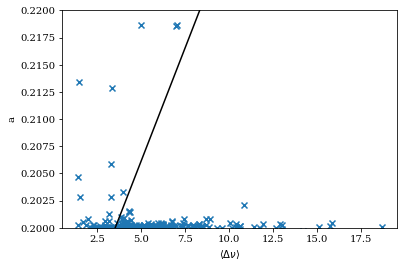

a = 0.152
b = 0.758


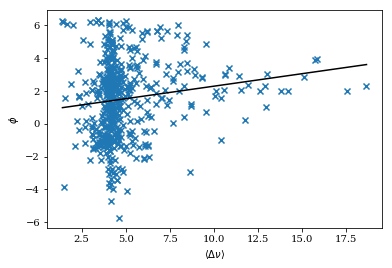

a = -0.009
b = 2.959


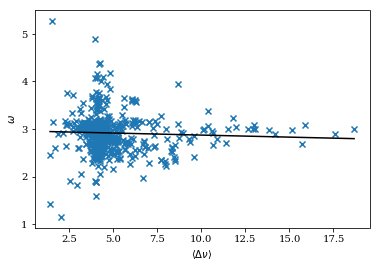

a = 0.022
b = -3.250


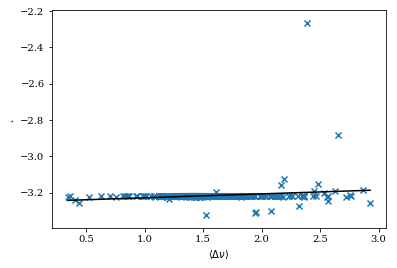

In [35]:
%matplotlib inline

dnu_a = leastsq(df['dnu'], df['a'])
plt.figure(1)
plt.scatter(df['dnu'],df['a'], marker='x')
plt.plot(dnu_a[0], dnu_a[1], 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'a')
plt.ylim(0.2,0.22)
plt.show()

dnu_phi = leastsq(df['dnu'], df['phi'])
plt.figure(2)
plt.scatter(df['dnu'],df['phi'], marker='x')
plt.plot(dnu_phi[0], dnu_phi[1], 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\phi$')
plt.show()

dnu_omega = leastsq(df['dnu'], df['omega'])
plt.figure(3)
plt.scatter(df['dnu'],df['omega'], marker='x')
plt.plot(dnu_omega[0], dnu_omega[1], 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\omega$')
plt.show()

dnu_k = leastsq(np.log(df['dnu']), np.log(df['k']))
plt.figure(4)
plt.scatter(np.log(df['dnu']),np.log(df['k']), marker='x')
plt.plot(dnu_k[0], dnu_k[1], 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\k$')
#plt.ylim(min(df['k']),max(df['k']))
plt.show()

plt.figure(4)
plt.scatter(np.log(df['dnu']),np.log(df['k']), marker='x')
plt.plot(dnu_k[0], 0.004**(dnu_k[1]), 'k')
plt.xlabel(r'$\left<\Delta\nu\right>$')
plt.ylabel(r'$\k$')
#plt.ylim(min(df['k']),max(df['k']))
plt.show()

In [14]:
print(df.loc[(df['k']>0.0402)])

        dnu      nmax   epsilon         k         a     omega       phi  \
3  4.996504  7.429712  0.010132  0.040928  0.221116  2.159576  6.273541   

        tau  
3  34.22991  
